<a href="https://colab.research.google.com/github/AdrieFahriza/PDA/blob/main/065119158_Adrie_Fahriza_Tri_Andes_Prak_PDA_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tugas 1 PDA**

Nama : Adrie Fahriza Tri Andes

NPM : 065119158

Kelas : B

#**Persiapan**

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import Dataset**

In [ ]:
# Mengambil dataset Games yang telah diedit
!wget -O Games_edited.csv https://raw.githubusercontent.com/AdrieFahriza/dataset/main/Games_edited.csv

--2022-04-13 17:02:11--  https://raw.githubusercontent.com/AdrieFahriza/dataset/main/Games_edited.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4470 (4.4K) [text/plain]
Saving to: ‘Games_edited.csv’

Games_edited.csv    100%[===================>]   4.37K  --.-KB/s    in 0s      

2022-04-13 17:02:12 (45.6 MB/s) - ‘Games_edited.csv’ saved [4470/4470]



In [ ]:
# Membaca dataset
df = pd.read_csv('Games_edited.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       49 non-null     object 
 1   Sales      49 non-null     float64
 2   Series     27 non-null     object 
 3   Release    49 non-null     object 
 4   Genre      49 non-null     object 
 5   Developer  49 non-null     object 
 6   Publisher  49 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [ ]:
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
2,Fall Guys,10.0,NaN,Aug-20,Battle royale,Mediatonic,Devolver Digital
3,Rust,9.0,NaN,Feb-18,Survival,Facepunch Studios,Facepunch Studios
4,Euro Truck Simulator 2,6.5,Truck Simulator,Oct-12,Vehicle simulation,SCS Software,SCS Software


#**Data Preprocessing**

In [ ]:
# Memisahkan bulan dan tahun dari kolom Release
d = pd.Series(df['Release'])
df['Month'] = d.str.split("-", expand = True)[0]
df['Year'] = d.str.split("-", expand = True)[1]

In [ ]:
# Mengubah bulan ke integer berdasarkan bulannya
def months(Month):
  if Month == 'Dec':
    Month = 12
  if Month == 'Nov':
    Month = 11
  if Month == 'Oct':
    Month = 10
  if Month == 'Sep':
    Month = 9
  if Month == 'Aug':
    Month = 8
  if Month == 'Jul':
    Month = 7
  if Month == 'Jun':
    Month = 6
  if Month == 'May':
    Month = 5
  if Month == 'Apr':
    Month = 4
  if Month == 'Mar':
    Month = 3
  if Month == 'Feb':
    Month = 2
  if Month == 'Jan':
    Month = 1
  return Month
    

In [ ]:
# Menerapkan fungsi
df['Month'] = df['Month'].apply(months)

In [ ]:
# Membuat random number untuk tanggal
p = np.random.randint(15)
c = str(p)

In [ ]:
# Menggabungkan bulan dan tahun ke satu kolom beserta tanggal yang dibuat dari random number
df['Release_Date'] = df.Month.astype(str) + '/' + c + '/' + df.Year.astype(str)

In [ ]:
# Mengubah kolom ke datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [ ]:
# Membuang kolom yang sudah tidak digunakan lalu menyusun ulang kolom
df.drop(columns = ['Release', 'Month', 'Year'], axis = 1, inplace = True)
df = df.reindex(columns = ['Name', 'Release_Date', 'Sales', 'Series', 'Genre', 'Developer', 'Publisher'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          49 non-null     object        
 1   Release_Date  49 non-null     datetime64[ns]
 2   Sales         49 non-null     float64       
 3   Series        27 non-null     object        
 4   Genre         49 non-null     object        
 5   Developer     49 non-null     object        
 6   Publisher     49 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.8+ KB


In [ ]:
# Membuat kelas berdasarkan kolom Sales
def m(Sales, Grade):
  if Sales > 30:
    Grade = 'A'
  elif 10 <= Sales <= 30:
    Grade = 'B'
  elif 5 <= Sales < 10:
    Grade = 'C'
  elif 2 <= Sales < 5:
    Grade = 'D'
  elif Sales < 2:
    Grade = 'F'
  return Grade 

In [ ]:
# Membuat dan menerapkan kolom Grade
df['Grade'] = 0
df['Grade'] = df.apply(lambda x:m(x['Sales'], x['Grade']), axis = 1)
df.head()

,Name,Release_Date,Sales,Series,Genre,Developer,Publisher,Grade
0,PlayerUnknown's Battlegrounds,2017-12-10,42.0,NaN,Battle royale,PUBG Studios,Krafton,A
1,Diablo III,2012-05-10,20.0,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,B
2,Fall Guys,2020-08-10,10.0,NaN,Battle royale,Mediatonic,Devolver Digital,B
3,Rust,2018-02-10,9.0,NaN,Survival,Facepunch Studios,Facepunch Studios,C
4,Euro Truck Simulator 2,2012-10-10,6.5,Truck Simulator,Vehicle simulation,SCS Software,SCS Software,C


#**Eksplorasi data dan Visualisasi**

**Release Date**

In [ ]:
# Mengetahui tanggal rilis terlama (2012) dan terbaru (2021)
df.Release_Date.describe(datetime_is_numeric = True)

count                               49
mean     2015-10-21 18:36:44.081632768
min                2012-02-10 00:00:00
25%                2013-09-10 00:00:00
50%                2015-11-10 00:00:00
75%                2017-09-10 00:00:00
max                2021-02-10 00:00:00
Name: Release_Date, dtype: object

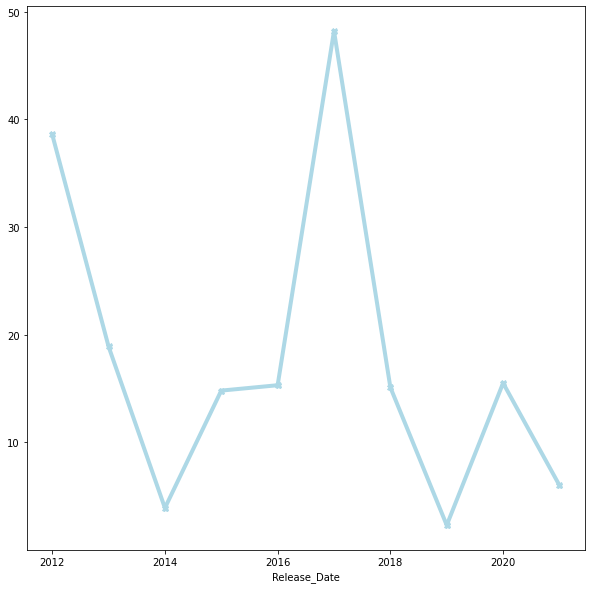

In [ ]:
# Visualisasi statistik perilisan game
df.groupby(df['Release_Date'].dt.strftime('%G')).Sales.sum().plot(color = 'lightblue', lw = 4, ls = '-', marker = 'X', figsize = (10, 10))

**Sales**

In [ ]:
# Menyortir Games berdasarkan Sales
df_sorted = df.sort_values(by = "Sales", ascending = False)
df_sorted.head()

,Name,Release_Date,Sales,Series,Genre,Developer,Publisher,Grade
0,PlayerUnknown's Battlegrounds,2017-12-10,42.0,NaN,Battle royale,PUBG Studios,Krafton,A
1,Diablo III,2012-05-10,20.0,Diablo,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,B
2,Fall Guys,2020-08-10,10.0,NaN,Battle royale,Mediatonic,Devolver Digital,B
3,Rust,2018-02-10,9.0,NaN,Survival,Facepunch Studios,Facepunch Studios,C
4,Euro Truck Simulator 2,2012-10-10,6.5,Truck Simulator,Vehicle simulation,SCS Software,SCS Software,C


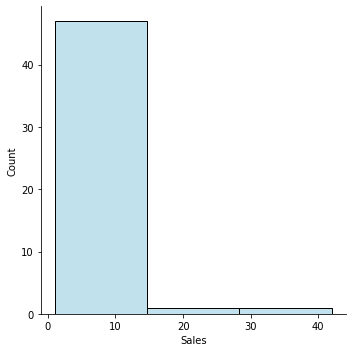

In [ ]:
# Visualisasi Sales
sns.displot(df.Sales, bins = 3, color = 'lightblue')

**Sales Grade**

In [ ]:
# Menghitung kelas Sales Grade
df.Grade.nunique()

5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


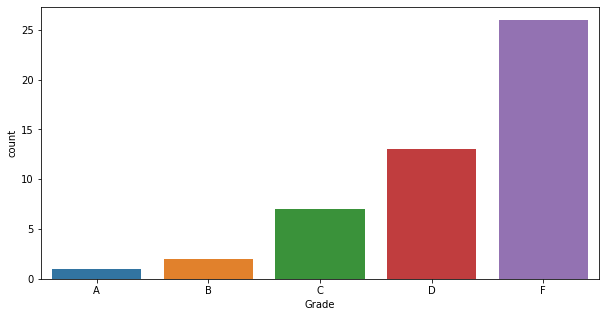

In [ ]:
# Visualisasi Grade
plt.figure(figsize = (10, 5))
sns.countplot(df.Grade)

**Top Selling Games by Sales**

<function matplotlib.pyplot.show>

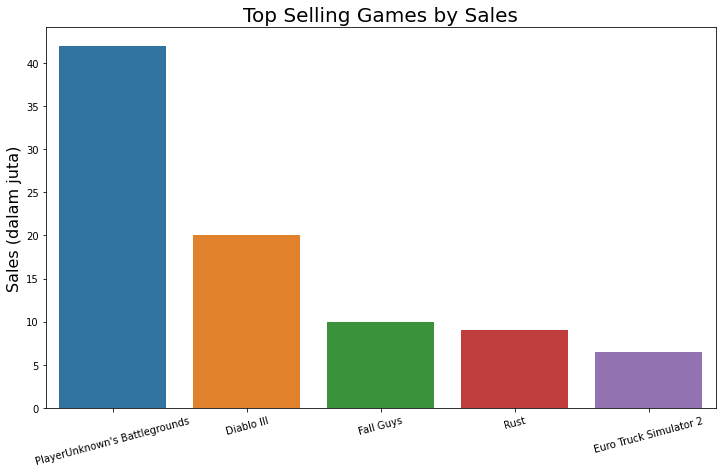

In [ ]:
# Memvisualisasikan Games terlaris berdasarkan Sales
plt.figure(figsize = (12, 7))
sns.barplot(x = 'Name', y = 'Sales', data = df_sorted[0:5])
plt.ylabel("Sales (dalam juta)", fontsize = 16)
plt.xticks(rotation = 15)
plt.xlabel('')
plt.title("Top Selling Games by Sales", fontsize = 20)
plt.show

**Genre**

In [ ]:
# Menghitung banyak Genre
df.Genre.nunique()

30

In [ ]:
# Menyortir Genre berdasarkan Sales
df_by_genre = df.groupby('Genre', as_index = False)['Sales'].sum()
df_by_genre = df_by_genre.sort_values(by = 'Sales', ascending = False)
df_by_genre

,Genre,Sales
7,Battle royale,52.0
1,Action role-playing,34.1
24,Survival,25.0
28,Vehicle simulation,8.0
8,City-building,7.0
9,Construction and management simulation,6.8
26,Tactical shooter,5.5
14,MMORPG,5.0
11,Grand strategy,3.0
12,Graphic adventure,3.0


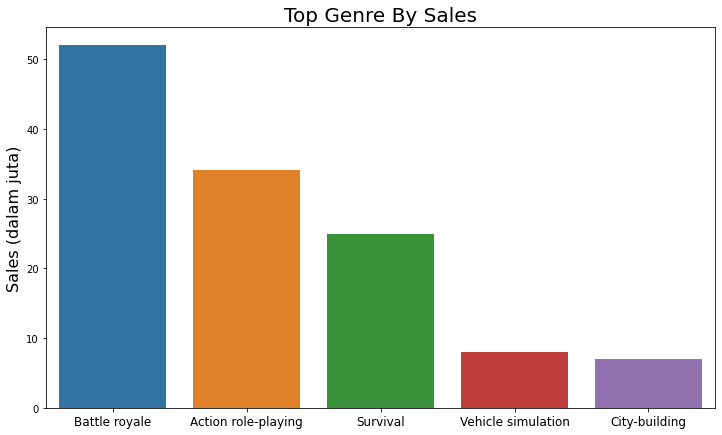

In [ ]:
# Memvisualisasikan Genre berdasarkan Sales
plt.figure(figsize = (12, 7))
plot_limit = df.groupby('Genre')['Sales'].sum().sort_values(ascending = False).index.values
sns.barplot(x = 'Genre', y = 'Sales', data = df_by_genre, order = plot_limit[0:5])
plt.ylabel("Sales (dalam juta)", fontsize = 16)
plt.xlabel('')
plt.xticks(fontsize = 12)
plt.title("Top Genre By Sales", fontsize = 20)
plt.show()

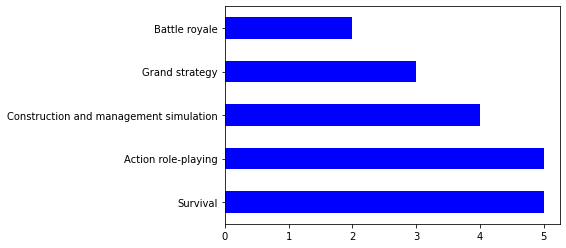

In [ ]:
# Memvisualisasikan top 5 Genre berdasarkan jumlah dalam bentuk bar diagram
df.Genre.value_counts().head().plot(kind = 'barh', color = 'blue')

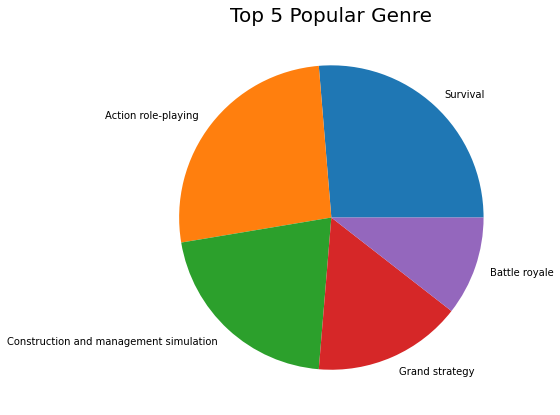

In [ ]:
# Memvisualisasikan top 5 Genre berdasarkan jumlah dalam bentuk pie chart
plt.figure(figsize = (15, 7))
df.Genre.value_counts().iloc[:5].plot(kind = 'pie', ylabel = '')
plt.title("Top 5 Popular Genre", fontsize = (20))
plt.show()

**Publisher**

In [ ]:
# Menghitung top 5 Publisher berdasarkan jumlah game yang telah dipubilish
df['Publisher'].value_counts().head(5)

Paradox Interactive       6
Blizzard Entertainment    3
Square Enix               2
Capcom                    2
SCS Software              2
Name: Publisher, dtype: int64

<function matplotlib.pyplot.show>

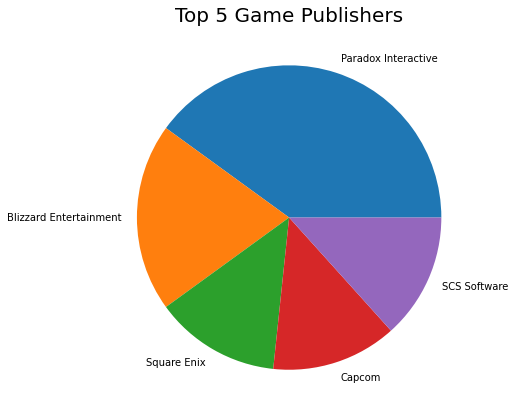

In [ ]:
# Memvisualisasikan top 5 Publisher berdasarkan jumlah game yang telah dipubilish
plt.figure(figsize = (15, 7))
df.Publisher.value_counts().iloc[:5].plot(kind = 'pie', ylabel = '')
plt.title("Top 5 Game Publishers", fontsize = (20))
plt.show
